Quiz 10 Slope of Regression with Outliers

/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fred Net worth prediction:  [[ 182.62587149]]
r-squared score: 0.878262470366
slope: [[ 5.07793064]]
intercept [ 25.21002155]


/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


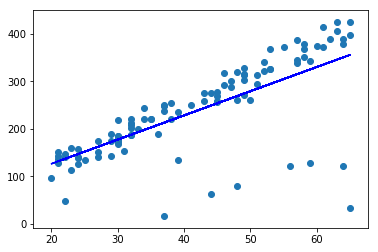

r-squared score: 0.983189455396
slope: [[ 6.36859481]]
intercept [-6.91861069]


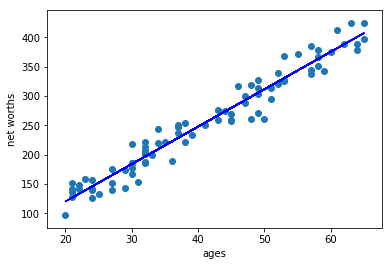

In [7]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
import math

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

def doRegression(feature_train, value_train, feature_test, value_test):    
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg = reg.fit(feature_train, value_train)
    
    print "Fred Net worth prediction: ", reg.predict([31])
    print "r-squared score:" , reg.score(feature_test, value_test)
    print "slope:", reg.coef_
    print "intercept", reg.intercept_
    
    return reg

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []
    
    r_error_list =  numpy.subtract(predictions,net_worths).tolist()
    
    for (x,y), r_error in numpy.ndenumerate(r_error_list):
        cleaned_data.append((ages[x][0], net_worths[x][0], math.pow(r_error, 2)))
   
    cleaned_data.sort(key=lambda tup: tup[2]) 
    cleaned_data = cleaned_data[:-9]
    
    return cleaned_data

reg = doRegression(ages_train, net_worths_train,ages_test, net_worths_test)


try:
    predictedAges = reg.predict(ages)
    plt.plot(ages, predictedAges, color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )




### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        
        print "r-squared score:" , reg.score(ages_test, net_worths_test)
        print "slope:", reg.coef_
        print "intercept", reg.intercept_
        
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"




Quiz 14 - Enron Outliers

[[  365788.   600000.]
 [  267102.  1200000.]
 [  170941.   350000.]
 [  243293.  1500000.]
 [  267093.   325000.]
 [  370448.  2600000.]
 [  197091.   400000.]
 [  130724.        0.]
 [  288589.   788750.]
 [  248546.   850000.]
 [  257486.   700000.]
 [  288542.  1200000.]
 [  251654.  1100000.]
 [  288558.   250000.]
 [   63744.        0.]
 [  357091.   850000.]
 [  271442.  3100000.]
 [  304110.  2000000.]
 [  187922.   250000.]
 [  213625.  1000000.]
 [  249201.   700000.]
 [  231330.   700000.]
 [  182245.   200000.]
 [  211788.  1700000.]
 [  224305.   800000.]
 [  273746.  1000000.]
 [  339288.  8000000.]
 [  216582.        0.]
 [  210500.   425000.]
 [  272880.   750000.]
 [     477.        0.]
 [  269076.   650000.]
 [  428780.  1500000.]
 [  211844.   200000.]
 [  206121.   600000.]
 [  174246.        0.]
 [  510364.  3000000.]
 [  365038.  1100000.]
 [  365163.  3000000.]
 [  162779.   100000.]
 [  236457.   200000.]
 [ 1072321.  7000000.]
 [  261516.   750000.]
 [  329078.

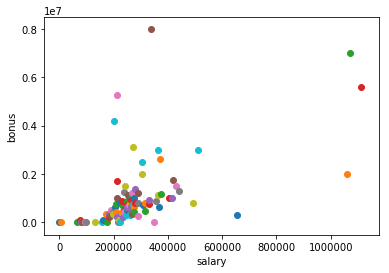

In [51]:
#!/usr/bin/python

import pickle
import numpy
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data_dict.pop( 'TOTAL', 0 )

data = featureFormat(data_dict, features)
numpy.set_printoptions(suppress=True)

print data 
data = data[data[:,0].argsort()]
print data
print data[-2:]


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

    
outliers = []
for outlier in data[-2:]:
    for p in data_dict:
        if data_dict[p]['bonus'] == outlier[1]:
            outliers.append(p)
    
print outliers
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
